In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv('forwards_prem_25.csv') 

In [5]:
df.Player.unique()

array(['T. Dibling', 'Mateus Fernandes', 'Savinho', 'F. Buonanotte',
       'A. Garnacho', 'Y. Minteh', 'B. El Khannouss', 'O. Hutchinson',
       'J. Durán', 'R. Højlund', 'L. Delap', 'G. Rutter', 'N. Madueke',
       'A. Diallo', 'A. Elanga', 'C. Palmer', 'M. Rogers',
       'Dango Ouattara', 'J. Doku', 'B. Saka', 'K. Schade', 'João Pedro',
       'J. Ramsey', 'J. Zirkzee', 'C. Jones', 'C. Summerville',
       'C. Archer', 'Gabriel Martinelli', 'B. Johnson', 'Rodrigo Muniz',
       'A. Gordon', 'N. Jackson', 'J. Strand Larsen', 'I. Ndiaye',
       'C. Hudson-Odoi', 'E. Haaland', 'J. Sancho', 'M. Gibbs-White',
       'M. Kudus', 'D. Szoboszlai', 'M. Damsgaard', 'E. Smith Rowe',
       'Pedro Neto', 'C. Gakpo', 'A. Semenyo', 'B. Mbeumo', 'D. McNeil',
       'Matheus Cunha', 'A. Isak', 'J. Kluivert', 'Evanilson', 'D. Núñez',
       'M. Tavernier', 'K. Havertz', 'J. Bellegarde', 'E. Eze', 'I. Sarr',
       'S. Mavididi', 'A. Armstrong', 'L. Bailey', 'J. Mateta',
       'K. Mitoma', 'D. S

# Z-Score

In [5]:
# Goalscoring strikers
original_metrics = ["npxG per 90", "Goal conversion, %", "Received\nPasses",
               "Shot assists per 90", "xA per 90", "Shots per 90",
              "Aerial duels won, %", "Touches in box per 90", "Non-penalty goals per 90"]

weights = [5, 5, 3,
           1, 1, 1,
           0.5, 3, 3]

In [7]:
# Calculate the composite score for the original metrics
df["Goalscoring strikers"] = np.dot(df[original_metrics], weights)

# Calculate the mean and standard deviation for the composite score of the original metrics
original_mean = df["Goalscoring strikers"].mean()
original_std = df["Goalscoring strikers"].std()

# Calculate the z-scores for the composite score of the original metrics
df["Goalscoring strikers"] = (df["Goalscoring strikers"] - original_mean) / original_std

# Map the z-scores of the original metrics to a range of 0 to 100 with two decimal places
df["Goalscoring strikers(0-100)"] = (norm.cdf(df["Goalscoring strikers"]) * 100).round(2)

In [9]:
# Sort the DataFrame by the z-scores of the original metrics in ascending order
df_original = df.sort_values("Goalscoring strikers", ascending=False)

In [11]:
df_original.head()

,Unnamed: 0,Player,Age,League,Position,Team,Birth country,Non-penalty goals per 90,npxG per 90,"Successful dribbles, %",...,"Accurate crosses, %",Smart passes per 90,xA per Shot Assist,Accelerations per 90,Aerial duels won per 90,Fouls suffered per 90,npxG per shot,Crosses per 90,Goalscoring strikers,Goalscoring strikers(0-100)
83,83,Mohamed Salah,32,Premier League 24-25,RAMF,Liverpool,Egypt,0.951087,0.923913,0.168478,...,0.869565,0.945652,0.695652,0.543478,0.054348,0.543478,0.695652,0.690217,2.339579,99.03
74,74,L. Díaz,28,Premier League 24-25,"LAMF, CF",Liverpool,Colombia,0.913043,0.826087,0.500000,...,0.657609,0.489130,0.228261,0.815217,0.673913,0.559783,0.576087,0.353261,1.838343,96.70
70,70,Diogo Jota,28,Premier League 24-25,CF,Liverpool,Portugal,0.967391,0.956522,0.788043,...,0.146739,0.576087,0.923913,0.576087,0.891304,0.619565,0.815217,0.434783,1.794011,96.36
48,48,A. Isak,25,Premier League 24-25,CF,Newcastle United,Sweden,0.989130,0.945652,0.076087,...,0.543478,0.766304,0.543478,0.527174,0.478261,0.081522,0.847826,0.380435,1.794011,96.36
15,15,C. Palmer,22,Premier League 24-25,AMF,Chelsea,England,0.869565,0.750000,0.684783,...,0.717391,0.907609,0.641304,0.701087,0.027174,0.858696,0.347826,0.630435,1.421480,92.24


In [13]:
df_sorted = df[["Player", "Age", "Team", "Goalscoring strikers(0-100)"]].sort_values(
    by="Goalscoring strikers(0-100)", ascending=False
)
df_sorted.head(10)


,Player,Age,Team,Goalscoring strikers(0-100)
83,Mohamed Salah,32,Liverpool,99.03
74,L. Díaz,28,Liverpool,96.70
70,Diogo Jota,28,Liverpool,96.36
48,A. Isak,25,Newcastle United,96.36
15,C. Palmer,22,Chelsea,92.24
35,E. Haaland,24,Manchester City,91.65
8,J. Durán,21,Aston Villa,91.23
73,Y. Wissa,28,Brentford,89.52
64,Gabriel Jesus,27,Arsenal,89.37
28,B. Johnson,23,Tottenham Hotspur,89.35


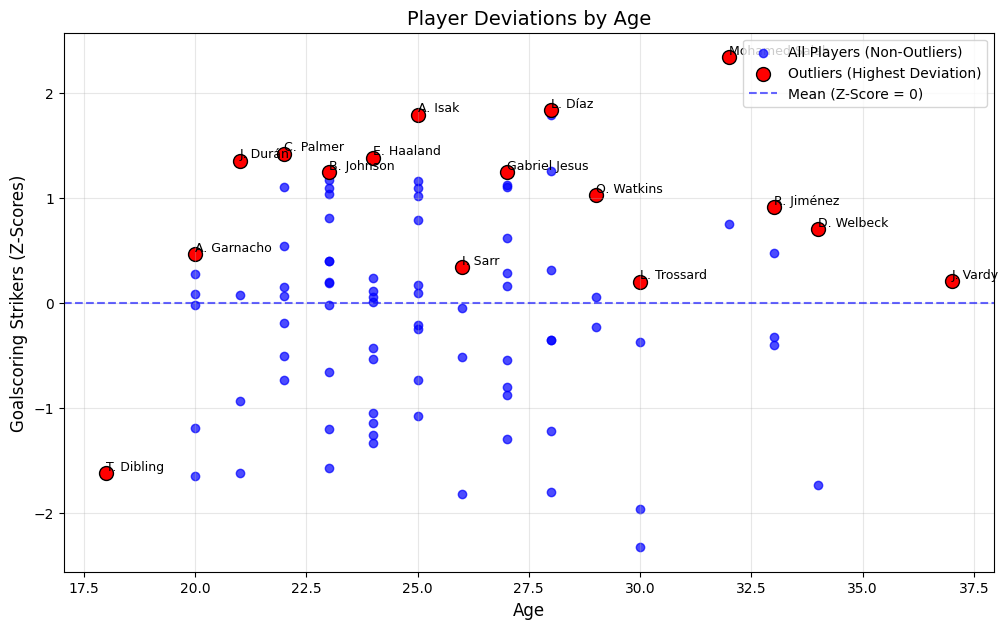

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
# Find the players with the highest deviation for each age group
highlighted_players = df.loc[df.groupby('Age')['Goalscoring strikers'].idxmax()]

# Scatter plot
plt.figure(figsize=(12, 7))

# Plot all players (non-outliers in blue)
plt.scatter(
    df['Age'],
    df['Goalscoring strikers'],
    color='blue',
    alpha=0.7,
    label='All Players (Non-Outliers)'
)

# Highlight outliers (players with highest deviation in each age group) in red
plt.scatter(
    highlighted_players['Age'],
    highlighted_players['Goalscoring strikers'],
    color='red',
    edgecolor='black',
    s=100,
    label='Outliers (Highest Deviation)'
)

# Annotate outliers with player names
for _, row in highlighted_players.iterrows():
    plt.text(
        row['Age'],
        row['Goalscoring strikers'],
        row['Player'],
        fontsize=9,
        ha='left',
        va='bottom'
    )

# Add labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('Goalscoring Strikers (Z-Scores)', fontsize=12)
plt.title('Player Deviations by Age', fontsize=14)
plt.axhline(0, color='blue', linestyle='--', alpha=0.6, label='Mean (Z-Score = 0)')
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


# Similar Players

In [ ]:
#Euclidean Distance

In [23]:
df.Player.unique()

array(['T. Dibling', 'Mateus Fernandes', 'Savinho', 'F. Buonanotte',
       'A. Garnacho', 'Y. Minteh', 'B. El Khannouss', 'O. Hutchinson',
       'J. Durán', 'R. Højlund', 'L. Delap', 'G. Rutter', 'N. Madueke',
       'A. Diallo', 'A. Elanga', 'C. Palmer', 'M. Rogers',
       'Dango Ouattara', 'J. Doku', 'B. Saka', 'K. Schade', 'João Pedro',
       'J. Ramsey', 'J. Zirkzee', 'C. Jones', 'C. Summerville',
       'C. Archer', 'Gabriel Martinelli', 'B. Johnson', 'Rodrigo Muniz',
       'A. Gordon', 'N. Jackson', 'J. Strand Larsen', 'I. Ndiaye',
       'C. Hudson-Odoi', 'E. Haaland', 'J. Sancho', 'M. Gibbs-White',
       'M. Kudus', 'D. Szoboszlai', 'M. Damsgaard', 'E. Smith Rowe',
       'Pedro Neto', 'C. Gakpo', 'A. Semenyo', 'B. Mbeumo', 'D. McNeil',
       'Matheus Cunha', 'A. Isak', 'J. Kluivert', 'Evanilson', 'D. Núñez',
       'M. Tavernier', 'K. Havertz', 'J. Bellegarde', 'E. Eze', 'I. Sarr',
       'S. Mavididi', 'A. Armstrong', 'L. Bailey', 'J. Mateta',
       'K. Mitoma', 'D. S

In [25]:
df.columns

Index(['Unnamed: 0', 'Player', 'Age', 'League', 'Position', 'Team',
       'Birth country', 'Non-penalty goals per 90', 'npxG per 90',
       'Successful dribbles, %', 'Goal conversion, %', 'Touches in box per 90',
       'Accurate short / medium passes, %', 'Passes per 90',
       'Shot assists per 90', 'xA per 90', 'Assists per 90',
       'Second assists per 90', 'Third assists per 90',
       'Progressive passes per 90', 'Progressive runs per 90', 'Duels won, %',
       'pAdj Tkl+Int per 90', 'Successful defensive actions per 90',
       'PAdj Sliding tackles', 'Defensive duels won, %', 'Fouls per 90',
       'Cards per 90', 'Shots blocked per 90', 'PAdj Interceptions',
       'Aerial duels won, %', 'Accurate long passes, %',
       '1st, 2nd, 3rd assists', 'Conceded goals per 90',
       'Prevented goals per 90', 'Shots against per 90', 'Save rate, %',
       'Exits per 90', 'Passes', 'Long Pass\nCmp %',
       '% of Passes\nBeing Short', '% of Passes\nBeing Lateral',
       'Rece

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

# Ensure Player column is the index
df.set_index('Player', inplace=True)

# Handle missing values
if df.isna().values.any():
    df = df.fillna(0)

# Separate numeric vs. categorical columns
num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
df = df[['Team', 'Position'] + num_cols]

# Scale numeric features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Calculate Euclidean distance matrix
eucl_dist = pairwise_distances(df[num_cols], metric='euclidean')

def get_similar_players(player_name, top_n=10):
    """
    Returns a list of tuples: (PlayerName, Team, Position, Distance)
    Sorted from smallest to largest distance.
    """
    index = df.index.get_loc(player_name)
    
    # Get distances from 'player_name' to every other player
    dist_scores = list(enumerate(eucl_dist[index]))
    
    # Sort by ascending distance (most similar first)
    dist_scores = sorted(dist_scores, key=lambda x: x[1])
    
    # Slice out the top_n (skipping index 0, which is the player themself)
    top_scores = dist_scores[1:top_n + 1]
    
    # Build the list of (player, team, position, distance)
    similar_players = [
        (
            df.index[i], 
            df.iloc[i]['Team'],
            df.iloc[i]['Position'], 
            dist
        ) 
        for i, dist in top_scores
    ]
    return similar_players

# Prompt user for player name
player_name = "Mohamed Salah"  # Replace with input("Enter player name: ") for dynamic input
similar_players = get_similar_players(player_name)

# Convert Euclidean distance to a 0-100 “similarity” scale
max_distance = max(similar_players, key=lambda x: x[3])[3]
similar_players = [
    (
        player, 
        team, 
        position, 
        100 * (1 - (dist / max_distance))  # Scale to 0–100
    )
    for (player, team, position, dist) in similar_players
]

# Print similar players
print(f"Players similar to {player_name}:")
for player, team, position, similarity_score in similar_players:
    print(f"Player: {player}")
    print(f"Team: {team}")
    print(f"Position: {position}")
    print(f"Similarity Score: {similarity_score:.2f}%\n")

# Optional: Write similar players to Excel
# similar_players_df = pd.DataFrame(similar_players, columns=['Player', 'Team', 'Position', 'Similarity Score'])
# similar_players_df.to_excel("similar_players.xlsx", index=False)
# print("Similar players saved to similar_players.xlsx")


Players similar to Mohamed Salah:
Player: Son Heung-Min
Team: Tottenham Hotspur
Position: LWF, LAMF, CF
Similarity Score: 28.81%

Player: A. Isak
Team: Newcastle United
Position: CF
Similarity Score: 13.12%

Player: H. Barnes
Team: Newcastle United
Position: LWF, RWF
Similarity Score: 12.01%

Player: B. Mbeumo
Team: Brentford
Position: CF, RWF, RAMF
Similarity Score: 10.64%

Player: C. Palmer
Team: Chelsea
Position: AMF
Similarity Score: 9.64%

Player: L. Trossard
Team: Arsenal
Position: LWF, CF, LW
Similarity Score: 8.38%

Player: J. Bowen
Team: West Ham United
Position: RW, CF, RAMF
Similarity Score: 3.30%

Player: A. Iwobi
Team: Fulham
Position: LAMF, RAMF
Similarity Score: 3.16%

Player: A. Gordon
Team: Newcastle United
Position: LWF, CF, RWF
Similarity Score: 0.27%

Player: D. McNeil
Team: Everton
Position: AMF, LW
Similarity Score: 0.00%



In [9]:
df.columns

Index(['Team', 'Position', 'Unnamed: 0', 'Age', 'Non-penalty goals per 90',
       'npxG per 90', 'Successful dribbles, %', 'Goal conversion, %',
       'Touches in box per 90', 'Accurate short / medium passes, %',
       'Passes per 90', 'Shot assists per 90', 'xA per 90', 'Assists per 90',
       'Second assists per 90', 'Third assists per 90',
       'Progressive passes per 90', 'Progressive runs per 90', 'Duels won, %',
       'pAdj Tkl+Int per 90', 'Successful defensive actions per 90',
       'PAdj Sliding tackles', 'Defensive duels won, %', 'Fouls per 90',
       'Cards per 90', 'Shots blocked per 90', 'PAdj Interceptions',
       'Aerial duels won, %', 'Accurate long passes, %',
       '1st, 2nd, 3rd assists', 'Conceded goals per 90',
       'Prevented goals per 90', 'Shots against per 90', 'Save rate, %',
       'Exits per 90', 'Passes', 'Long Pass\nCmp %',
       '% of Passes\nBeing Short', '% of Passes\nBeing Lateral',
       'Received\nPasses', 'Goals prevented %', 'Accurat

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Ensure Player column is the index
df.set_index('Player', inplace=True)

# Handle missing values
df = df.fillna(0)

# Separate numeric vs. categorical columns
num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
df = df[['Team', 'Position'] + num_cols]

# Scale numeric features
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Calculate cosine similarity matrix
cos_sim = cosine_similarity(df[num_cols])

def get_similar_players(player_name, top_n=10):
    """
    Returns a list of tuples: (PlayerName, Team, Position, Similarity)
    Sorted from largest to smallest similarity.
    """
    index = df.index.get_loc(player_name)
    
    # Get similarity scores from 'player_name' to every other player
    sim_scores = list(enumerate(cos_sim[index]))
    
    # Sort by descending similarity (most similar first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Slice out the top_n (skipping index 0, which is the player themself)
    top_scores = sim_scores[1:top_n + 1]
    
    # Build the list of (player, team, position, similarity)
    similar_players = [
        (df.index[i], 
         df.iloc[i]['Team'],
         df.iloc[i]['Position'], 
         sim
        ) 
        for i, sim in top_scores
    ]
    return similar_players

# Prompt user for player name
player_name = "Mohamed Salah"
similar_players = get_similar_players(player_name)

# Print similar players
print(f"Players similar to {player_name}:")
for player, team, position, similarity_score in similar_players:
    print(f"Player: {player}")
    print(f"Team: {team}")
    print(f"Position: {position}")
    print(f"Similarity Score: {similarity_score:.2f}\n")


Players similar to Mohamed Salah:
Player: Son Heung-Min
Team: Tottenham Hotspur
Position: LWF, LAMF, CF
Similarity Score: 0.92

Player: C. Palmer
Team: Chelsea
Position: AMF
Similarity Score: 0.88

Player: A. Isak
Team: Newcastle United
Position: CF
Similarity Score: 0.88

Player: H. Barnes
Team: Newcastle United
Position: LWF, RWF
Similarity Score: 0.88

Player: B. Mbeumo
Team: Brentford
Position: CF, RWF, RAMF
Similarity Score: 0.87

Player: L. Trossard
Team: Arsenal
Position: LWF, CF, LW
Similarity Score: 0.87

Player: A. Iwobi
Team: Fulham
Position: LAMF, RAMF
Similarity Score: 0.85

Player: A. Gordon
Team: Newcastle United
Position: LWF, CF, RWF
Similarity Score: 0.85

Player: J. Bowen
Team: West Ham United
Position: RW, CF, RAMF
Similarity Score: 0.85

Player: D. McNeil
Team: Everton
Position: AMF, LW
Similarity Score: 0.85



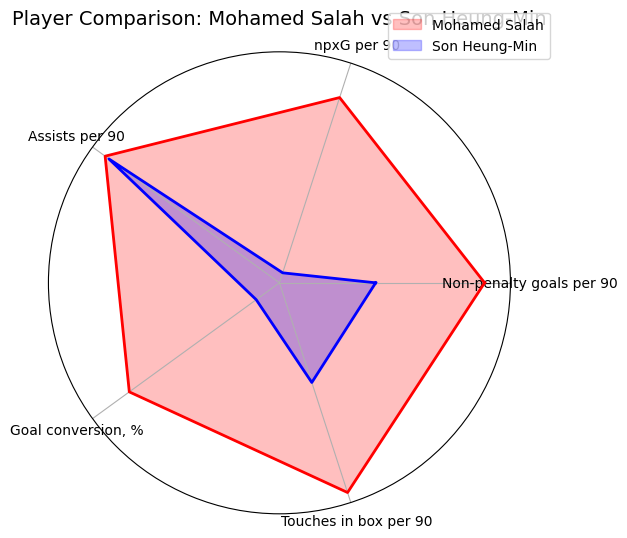

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_chart(player_name, similar_player, features):
    """
    Plots a radar chart comparing a player's profile with a similar player.
    """
    # Extract feature values for the players
    player_values = df.loc[player_name, features].values
    similar_values = df.loc[similar_player, features].values
    
    # Create radar chart angles
    num_vars = len(features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the circle
    
    # Append the first value to close the radar plot
    player_values = np.concatenate((player_values, [player_values[0]]))
    similar_values = np.concatenate((similar_values, [similar_values[0]]))
    
    # Create the radar plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, player_values, color='red', alpha=0.25, label=player_name)
    ax.plot(angles, player_values, color='red', linewidth=2)
    ax.fill(angles, similar_values, color='blue', alpha=0.25, label=similar_player)
    ax.plot(angles, similar_values, color='blue', linewidth=2)
    
    # Add labels
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    # Title and display
    plt.title(f"Player Comparison: {player_name} vs {similar_player}", fontsize=14, pad=20)
    plt.show()

# Features to include in the radar chart
features = ['Non-penalty goals per 90',
       'npxG per 90', 'Assists per 90', 'Goal conversion, %',
       'Touches in box per 90']  # Example features

# Plot Salah vs Son Heung-Min
plot_radar_chart('Mohamed Salah', 'Son Heung-Min', features)
